# **Análisis Cluster**
El análisis cluster, o análisis de conglomerados, es una técnica estadística multivariante, cuyo objetivo es agrupar los elementos o variables análizadas en distintos grupos (clusters) en función de la homogeneidad existente entre ellas. 

El análisis cluster engloba distintos métodos, en nuestro ejemplo nos centraremos en el método K-means. El método **K-means** agrupa los elementos o variables analizadas en un número de clusters ya predeterminado. 

Para llevar a cabo nuestro ejemplo, escogeremos el dataset **desigualdad_ccaa**, elaborado a partir de los datos publicados por el INE. 

## **K-means**

###**Carga de librerias y datos**
Cargamos las librerias que vamos a utilizar en el modelo.

In [1]:
# Preparación de los datos 
import numpy as np
import pandas as pd
# Modelado 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
# Visualización
import matplotlib.pyplot as plt


Subimos a Colab el archivo que vamos a utilizar, en nuestro caso es **desigualdad_ccaa.** 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving desigualdad_ccaa.xlsx to desigualdad_ccaa.xlsx


Visualizamos los datos del archivo que acabamos de cargar.

In [3]:
datos=pd.read_excel('desigualdad_ccaa.xlsx')
datos.head()

,CCAA,PIBpc,Rmedper,Rmedhog,Riespob,Evidanac,Tmortinf,Salmal,Analf,Salmed,Salmedmuj,Salmedhom,Paro,Parojuv,Parold,Ocuptc,Condhog,Gastomedper,Gastomedhog,Seg,Mencond,Pobsed,Satisviv,Satiseco,Satistrab,Probviv,Emp,Empind,Empcons,Empcotrahos,Empserv,Pobactdisc,Pobactnodisc,Vivord,Vivint,Vivfijo,Vivmovil,Niñomovil,Niñordena,Niñoint,Sobremay,Obemay,Sobremen,Obemen,Poblfum,Poblbeb,Empord,Empint,Empweb,Empsoc
0,Andalucía,19633,9160,23826,31.3,82.22,3.17,7.75,2.6,21805.92,18672.11,24712.69,21.19,41.69,32.5,84.6,1.37,10602.70,27532.66,5.5,0.17,39.47,7.3,5.6,7.0,71.0,531045,28395,57938,212817,231895,30.2,73.9,76.8,94.7,61.8,99.3,67.6,85.5,91.3,37.5,21.0,20.9,12.5,22.7,16.2,99.2,98.2,71.5,54.3
1,Aragón,28727,12300,29672,17.9,83.90,2.14,6.54,0.7,23531.83,20074.25,26640.59,10.03,27.35,28.4,86.2,1.24,12775.48,30716.04,3.8,0.13,37.32,7.4,6.0,7.0,81.5,90682,6532,11787,31636,40727,40.0,79.9,85.0,96.3,80.0,99.7,71.2,96.1,93.5,36.8,15.7,18.2,2.5,24.1,19.0,99.2,98.3,85.4,64.7
2,"Asturias, Principado de",23299,12523,27897,20.7,82.83,2.66,6.53,0.5,23914.61,19744.94,27912.91,14.19,28.70,41.5,86.1,0.35,12317.84,27367.02,1.8,0.21,33.92,7.5,6.3,6.9,69.9,68433,3495,8133,26459,30346,31.6,74.0,79.2,93.4,69.8,99.0,65.7,94.9,95.3,37.4,21.7,18.2,7.9,23.8,18.3,98.9,98.1,81.6,61.3
3,"Balears, Illes",28213,12410,32179,12.0,83.71,3.25,4.99,1.5,22800.87,21085.74,24437.58,11.74,29.18,16.7,87.3,1.07,12765.75,33125.73,3.6,0.24,39.58,7.7,5.9,7.3,65.4,100022,4834,17291,31172,46725,38.5,79.7,85.2,95.6,75.4,98.9,68.7,95.1,98.5,31.1,15.5,23.0,10.0,23.1,16.7,99.3,97.6,81.4,73.0
4,Canarias,21244,9487,24565,28.5,82.79,2.72,7.55,1.6,20763.48,19051.01,22333.63,20.49,42.18,34.0,87.1,1.34,9851.50,25389.65,6.4,0.26,41.49,7.1,5.6,7.1,76.1,152756,5677,16951,58466,71662,25.8,75.8,80.5,96.2,81.8,99.5,65.4,91.4,90.4,37.2,19.3,25.2,10.4,22.3,6.6,98.3,97.8,67.8,62.8


Creamos las diferentes variables que vamos a utilizar. En este caso, en la variable columnas, seleccionaremos las que vamos a analizar, en nuestro caso, el salario medio anual de mujeres y hombres. Después, la lista que acabamos de crear, la convertimos en un DataFrame (resultado). Además, también tenemos nuestra serie con las comunidades autónomas.

In [4]:
columnas = ["Salmedmuj", "Salmedhom"]
resultado = datos[columnas]
comunidades = datos["CCAA"]


###**Método Elbow**
Para ver el número de cluster adecuado, aplicaremos el **método Elbow** o método del codo, en el cual medimos la distancia promedia de todos los puntos del cluster y su centroide, a través de la suma de sus cuadrados, con el objetivo de minimizar la varianza intra-cluster y maximizar de la varianza inter-cluster. 

Para calcularlo matemáticamente, nos situamos en el gráfico, donde tenemos en el eje x el número de cluster utilizados y en el eje y la suma de los cuadrados intra-cluster (dentro del cluster). Trazamos una línea entre los puntos calculados entre el primer y el último cluster, ese punto óptimo, en el que hay una mayor homogeneidad dentro del cluster y una mayor diferencia entre los cluster, es el punto más distante con la línea trazada. Dado que tenemos 17 variables, creemos conveniente encoger que los cluster se sitúen entre 1 y 10, ya que el punto más alejado se encontrará ahí, en 17 la distancia es 0. 

Para calcular la distancia de cada punto a la línea trazada se utiliza la siguiente fórmula:  

$$D[(P_0,P_1),(x,y)] = \frac{|(y_1-y_0)x-(x_1-x_0)y+x_1y_o-y_1x_0|}{\sqrt{(y_1-y_0)^2+(x_1-x_0)^2}}$$  

Para calcularlo en nuestro código, utilizaremos nuestra lista inercia[ ],que contiene la suma de cuadrados dentro de los cluster y nos delvolverá el número optimo de cluster.


El número óptimo de clusters es:  3 



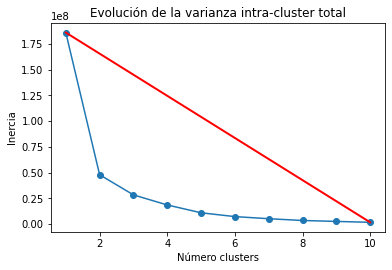

In [5]:
range_clusters = range(1, 11)
inercia = []

for i in range_clusters:
    modelo = KMeans(
                        n_clusters   = i, 
                        n_init       = 20, 
                        random_state = 50
                     )
    modelo.fit(resultado)
    inercia.append(modelo.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_clusters, inercia, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Inercia')

# Trazamos la línea
x0, y0 = 1, inercia[0]
x1, y1 = 10, inercia[len(inercia)-1]
ax.plot([x0, x1], [y0, y1], color='red', linewidth=2)

# Determinamos las distancias desde cada punto x, y a la recta P_0-P_1
distancias = []
for i in range(len(inercia)):
  x = i+2
  y = inercia[i]
  numerador = abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0)
  denominador = np.sqrt((y1 - y0)**2 + (x1 - x0)**2)
  distancias.append(numerador/denominador)
print('\nEl número óptimo de clusters es: ', distancias.index(max(distancias)) + 2, '\n')

Ahora, creamos los **cluster**. En primer lugar, vamos a escalar el modelo, para que los datos se situen dentro de un mismo rango, para ello usamos scale ( ).Además, utilizamos fit( ) para ajustar el modelo a los datos que hemos cargado y el método predict( ) para realizar predicciones. 

In [6]:
resultado_escalado = scale(resultado)
modelo = KMeans(n_clusters=3)
modelo.fit(resultado_escalado)
grupos = modelo.predict(resultado_escalado)

Una vez creados los cluster, los relacionamos con nuestra variable comunidades que contiene las Comunidades Autonomas. 

In [7]:
clusters=pd.concat([comunidades,pd.DataFrame(grupos)],axis=1)
clusters.rename(columns={"CCAA":"Comunidades Autónomas",0:"Cluster"},inplace=True)
clusters

,Comunidades Autónomas,Cluster
0,Andalucía,2
1,Aragón,0
2,"Asturias, Principado de",0
3,"Balears, Illes",0
4,Canarias,2
5,Cantabria,0
6,Castilla y León,2
7,Castilla - La Mancha,2
8,Cataluña,1
9,Comunitat Valenciana,2


###**Representación gráfica**
Vamos a visualizar nuestro modelo, para ello, definimos la función que vamos a llevar a cabo, en este caso situación. En nuestro gráfico de dispersión tendremos dos parametros, x e y, que serán los datos escogidos, c que es el color que le vamos a dar a los datos y s el tamaño de la forma en la que se presenta el dato (marker). 

Además, introducimos unos centroides que se situaran en el centro de cada cluster. 

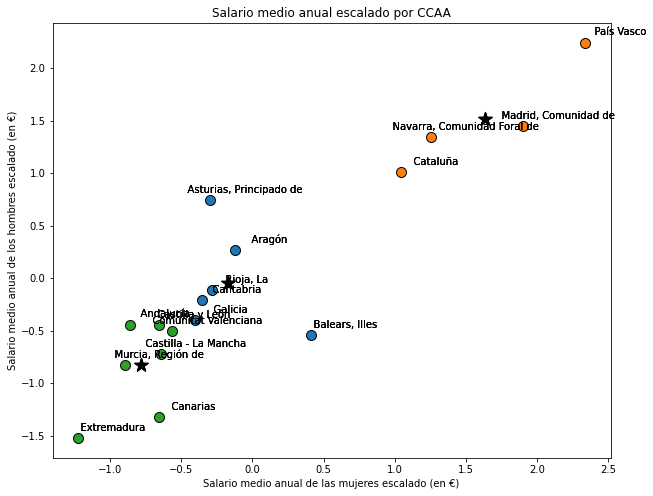

In [8]:
def situacion (x, y, z):
  fig, ax = plt.subplots()
  for i in np.unique(grupos):
    ax.scatter(
        x = resultado_escalado[grupos == i, 0],
        y = resultado_escalado[grupos == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        s=100,
        marker    = 'o',
        edgecolor = 'black', 
        label= f'Cluster {i}'
    )
    for i in range(17):       
       ax.text(x[i]+0.2,y[i]+0.1, z[i], color = 'black', ha = 'center', va = 'center')
    ax.set_title('Salario medio anual escalado por CCAA')
    ax.set_xlabel('Salario medio anual de las mujeres escalado (en €)')
    ax.set_ylabel('Salario medio anual de los hombres escalado (en €)')
    ax.scatter(
    x = modelo.cluster_centers_[:,0],
    y = modelo.cluster_centers_[:,1], 
    c = 'black',
    s = 200,
    marker = '*',
    label  = 'centroides'
  )
  fig.set_figheight(8)
  fig.set_figwidth(10)
  fig.show()
ax.set_title('Clusters generados por Kmeans')
situacion(resultado_escalado[:,0],resultado_escalado[:,1],comunidades)

Podemos concluir que las CCAA se han agrupado en clusters según su nivel salarial. En este caso, el cluster de color naranja se compone con las comunidades con mayor salario medio y el cluster verde con las que menor salario medio tienen y no tanto con la diferencia entre el nivel salarial de hombres y mujeres. Si quisieramos ver las diferencias salariales entre hombres y mujeres podríamos hacer un análisis a través de la diferencia porcentual entre ambos. 